 # Data Visualizations

In [104]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text 
from nltk.stem.snowball import SnowballStemmer # stemmes words
stemmer = SnowballStemmer("english") # choose a language
tokenizer = RegexpTokenizer(r'[A-Za-z]+') #defining the tokenizer 

#reading the dataset
url_df= pd.read_csv("datasets.csv")
data = url_df.sample(frac = 1)

In [105]:
def transform(url_df):
    url_df['text_tokenized'] = url_df.url.map(lambda t: tokenizer.tokenize(t))
    url_df['text_stemmed'] = url_df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

    url_df['text_sent'] = url_df['text_stemmed'].map(lambda l: ' '.join(l))
    return url_df
transform(data)

,url,type,text_tokenized,text_stemmed,text_sent
264620,http://pastehtml.com/view/bfz59so09.html,phishing,"[http, pastehtml, com, view, bfz, so, html]","[http, pastehtml, com, view, bfz, so, html]",http pastehtml com view bfz so html
15196,http://distractify.com/post/related/id/54f4483...,benign,"[http, distractify, com, post, related, id, f,...","[http, distractifi, com, post, relat, id, f, c...",http distractifi com post relat id f c a c bad...
276620,absoluteastronomy.com/topics/List_of_New_York_...,benign,"[absoluteastronomy, com, topics, List, of, New...","[absoluteastronomi, com, topic, list, of, new,...",absoluteastronomi com topic list of new york r...
40888,http://www.mediwe.be/nl/controleaanvragen?view...,defacement,"[http, www, mediwe, be, nl, controleaanvragen,...","[http, www, mediw, be, nl, controleaanvragen, ...",http www mediw be nl controleaanvragen view wi...
436984,mikesguitartalk.com/2011/11/best-all-female-tr...,benign,"[mikesguitartalk, com, best, all, female, trib...","[mikesguitartalk, com, best, all, femal, tribu...",mikesguitartalk com best all femal tribut band...
...,...,...,...,...,...
596393,dreamsbridallasvegas.com/files/images/davinci/...,benign,"[dreamsbridallasvegas, com, files, images, dav...","[dreamsbridallasvega, com, file, imag, davinci...",dreamsbridallasvega com file imag davinci safe...
650036,www.watchman.org/occult/frpgames2.htm,phishing,"[www, watchman, org, occult, frpgames, htm]","[www, watchman, org, occult, frpgame, htm]",www watchman org occult frpgame htm
65885,http://kakaku.com/bicycle/city-bicycle/ranking...,benign,"[http, kakaku, com, bicycle, city, bicycle, ra...","[http, kakaku, com, bicycl, citi, bicycl, rank...",http kakaku com bicycl citi bicycl rank priced...
292527,http://susanbroccoli.com/index.php?option=com_...,defacement,"[http, susanbroccoli, com, index, php, option,...","[http, susanbroccoli, com, index, php, option,...",http susanbroccoli com index php option com us...


In [109]:
data.type.unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [110]:
benign = data.query("type == 'benign'")
malware = data.query("type == 'malware'")
defacement = data.query("type == 'defacement'")
phishing = data.query("type == 'phishing'")

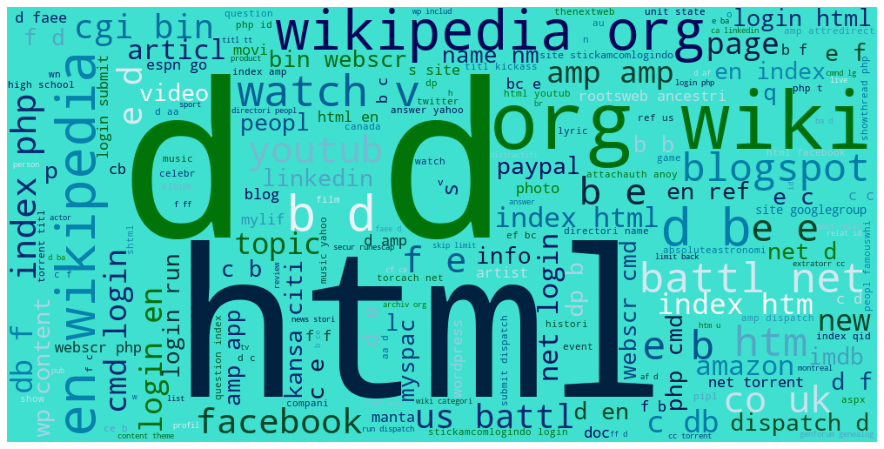

In [111]:
def text_data(benign):
    benign_text = benign.text_sent.values
    benign_text = ','.join(str(x) for x in benign_text)
    return benign_text
def plot_cloud(wordcloud):
    plt.figure(figsize=(18, 8))
    stop_words = ['d', 'b', 'https', 'http', 'dd', 'nn', 'n', 'nm', 'f', 'id', 'bb', 'e'
                 'a', 'an', 'the', 'and', 'it', 'for', 'or', 'but', 'in', 'my', 'your', 'our', 'and' 'their'," "]
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 1000, height = 500, background_color='#40E0D0', 
                      colormap="ocean",  random_state=10).generate(text_data(benign))
plot_cloud(wordcloud)

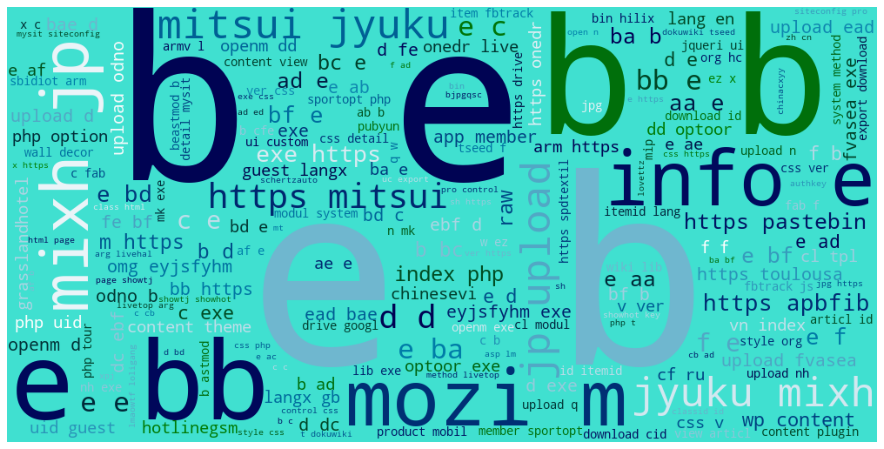

In [112]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='#40E0D0', 
                      colormap="ocean",  random_state=10).generate(text_data(malware))
plot_cloud(wordcloud)

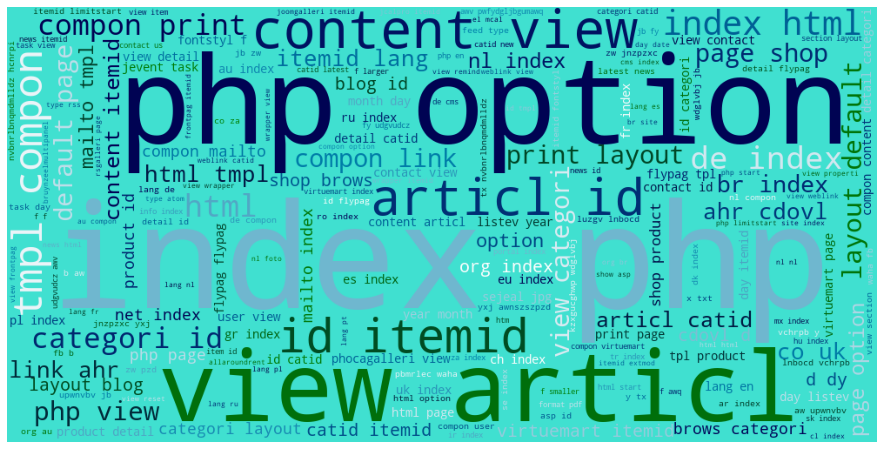

In [113]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='#40E0D0', 
                      colormap="ocean",  random_state=10).generate(text_data(defacement))
plot_cloud(wordcloud)

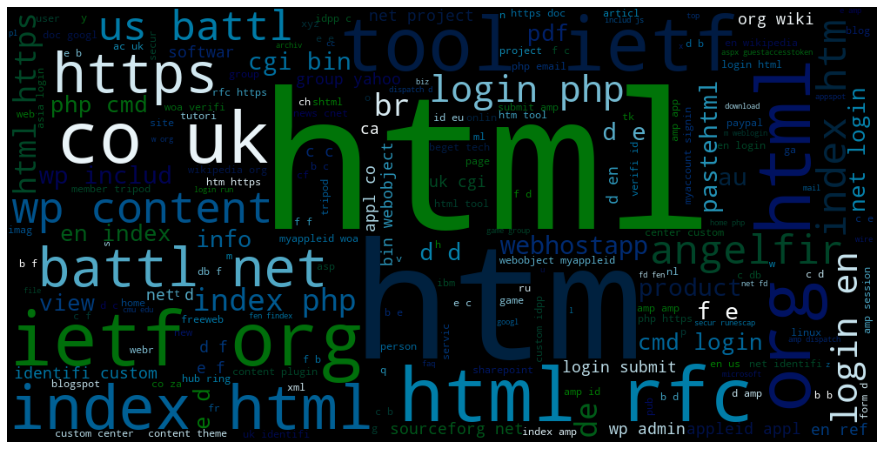

In [114]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='#000000', 
                      colormap="ocean",  random_state=10).generate(text_data(phishing))
plot_cloud(wordcloud)